In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
import csv
plt.style.use('fivethirtyeight')

### Author: Harsha Mallajosyula
#### Data Scientist
#### City of Los Angeles Mayor's Office

In [2]:
df_courses=pd.read_csv('LA_construction_course_descriptions.tsv', sep='\t', names=['course_names', 'course_desc', 'course_category'])

In [3]:
df_courses.head()

,course_names,course_desc,course_category
0,PLUMBNG 026 - Plumbing Layout And Estimating I,This course covers fundamentals of blueprint r...,PLUMBNG
1,PLUMBNG 028 - Plumbing Code I,Introduction is given in plumbing codes and or...,PLUMBNG
2,PLUMBNG 029 - Plumbing Code II,Instruction is given in the uniform plumbing c...,PLUMBNG
3,PLUMBNG 031 - Backflow Prevention Devices,This course is designed to prepare student for...,PLUMBNG
4,PLUMBNG 111 - Introduction To Plumbing,This course surveys the history of the Plumbin...,PLUMBNG


In [4]:
len(df_courses)

84

In [5]:
from nltk.stem import PorterStemmer

In [6]:
porter = PorterStemmer()

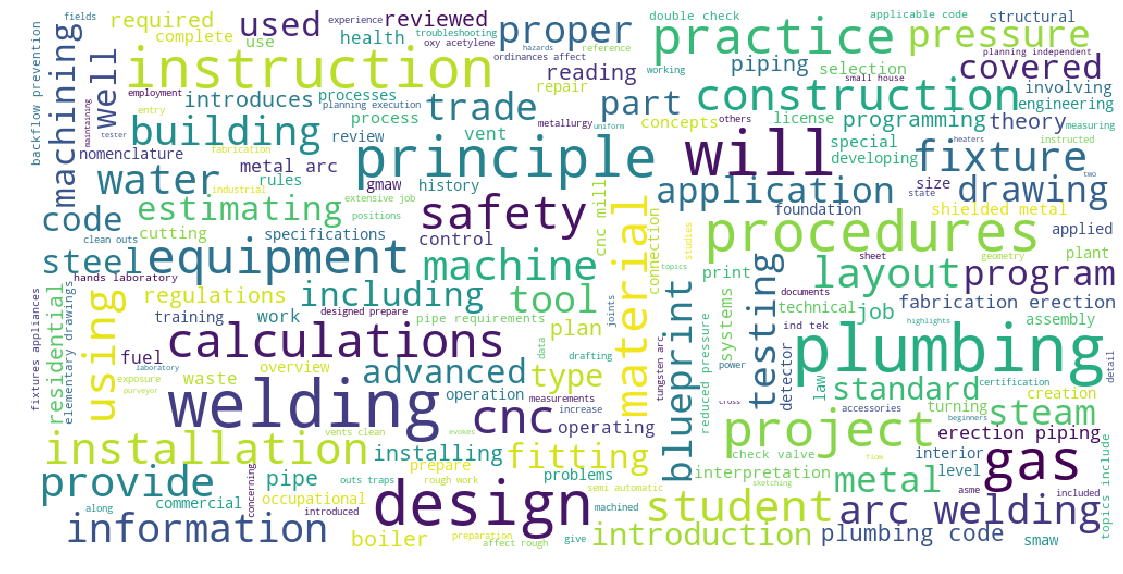

<Figure size 432x288 with 0 Axes>

In [7]:
#job titles word clouds
#generating positive reviews word cloud
course_desc_words = ' '.join(porter.stem(str(cd)) for cd in df_courses['course_desc'])

for word in course_desc_words:
    re.sub(r'[^\w\s]','',word)


more_stopwords = {'course','offers','instructions','study','methods','given','students','develop','city','county',
                  'areas','basic','industry','related','placed','emphasis','skills','techniques','covers','fundamentals'
                  , 'involves', 'current'
                 }
STOPWORDS = STOPWORDS.union(more_stopwords)

# remove URLs and words that start with @
course_desc_cleaned_tags = " ".join([word for word in course_desc_words.split()
                            ])

wordcloud = WordCloud(
                      #font_path='/Users/hmallajosyula/Library/Fonts/CabinSketch-Bold.ttf',
                      stopwords=STOPWORDS,
                      max_font_size=60,
                      background_color='white',
                      width = 1000,
                      height = 500
                     ).generate(course_desc_cleaned_tags)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis('off')
#plt.figure(figsize=(1000,1000))
plt.show()
plt.savefig('wordcloud_job_desc.png', bbox_inches='tight')

In [8]:
import nltk
from nltk import FreqDist
from nltk.collocations import *
from nltk.tokenize import *

In [9]:
course_desc_stopwords_cleaned = " ".join([word for word in course_desc_words.split() if word.lower() not in STOPWORDS and len(word)>3
                            ])

In [10]:
course_desc_stopwords_punc_cleaned = " ".join([re.sub(r'[^\w\s]','',word) for word in course_desc_stopwords_cleaned.split() if word not in STOPWORDS
                            ])

In [11]:
#frequency distribution of positive reviews
long_words = [w.lower() for w in course_desc_stopwords_punc_cleaned.split()]
fdist1 = FreqDist(long_words)
fdist1.most_common(5)

[('welding', 41),
 ('plumbing', 35),
 ('will', 28),
 ('design', 26),
 ('procedures', 21)]

In [12]:
fdist2= FreqDist(nltk.ngrams(course_desc_stopwords_punc_cleaned.split(),2))
fdist2.most_common(200)

[(('metal', 'welding'), 8),
 (('plumbing', 'industry'), 6),
 (('plumbing', 'fixtures'), 6),
 (('fabrication', 'erection'), 6),
 (('erection', 'piping'), 6),
 (('shielded', 'metal'), 5),
 (('piping', 'layout'), 4),
 (('layout', 'design'), 4),
 (('pipe', 'requirements'), 4),
 (('reviewed', 'instruction'), 4),
 (('plumbing', 'code'), 4),
 (('backflow', 'prevention'), 4),
 (('double', 'check'), 4),
 (('reduced', 'pressure'), 4),
 (('elementary', 'drawings'), 4),
 (('topics', 'include'), 4),
 (('proper', 'procedures'), 4),
 (('instruction', 'layout'), 4),
 (('procedures', 'fabrication'), 4),
 (('fixtures', 'appliances'), 4),
 (('oxyacetylene', 'welding'), 4),
 (('plumbing', 'codes'), 3),
 (('codes', 'ordinances'), 3),
 (('ordinances', 'affect'), 3),
 (('affect', 'roughin'), 3),
 (('roughin', 'work'), 3),
 (('work', 'areas'), 3),
 (('areas', 'installation'), 3),
 (('installation', 'wastes'), 3),
 (('wastes', 'vents'), 3),
 (('traps', 'fittings'), 3),
 (('fittings', 'vents'), 3),
 (('vents', 

In [13]:
import re
s = 'vision,'
s = re.sub(r'[^\w\s]','',s)
s

'vision'

In [14]:
with open("bigrams_courses_raw_data.csv", "w") as fp:
    writer = csv.writer(fp, quoting=csv.QUOTE_ALL)
    writer.writerows(fdist2.most_common(200))

In [15]:
count_words=0
for w in course_desc_stopwords_punc_cleaned.split():
    count_words = count_words+1
print(count_words)

1833


In [19]:
df_bigrams=pd.read_csv('bigrams_courses_cleaned_labeled_manually.csv')

In [20]:
df_bigrams.head()

,Bigram,Frequency,Label
0,metal welding,8,Hard skill
1,plumbing fixtures,6,Hard skill
2,erection piping,6,Hard skill
3,shielded metal,5,Hard skill
4,piping layout,4,Hard skill


In [21]:
df_hardskills = df_bigrams[df_bigrams['Label']=='Hard skill']

In [22]:
len(df_hardskills)

113

In [23]:
df_hardskills.head()

,Bigram,Frequency,Label
0,metal welding,8,Hard skill
1,plumbing fixtures,6,Hard skill
2,erection piping,6,Hard skill
3,shielded metal,5,Hard skill
4,piping layout,4,Hard skill


In [24]:
df_hardskills.reset_index(inplace=True)

In [25]:
df_hardskills.head()

,index,Bigram,Frequency,Label
0,0,metal welding,8,Hard skill
1,1,plumbing fixtures,6,Hard skill
2,2,erection piping,6,Hard skill
3,3,shielded metal,5,Hard skill
4,4,piping layout,4,Hard skill


In [26]:
df_hardskills.drop(df_hardskills.columns[0],axis=1,inplace=True)

C:\Users\myrtmp235\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [27]:
df_hardskills.head()

,Bigram,Frequency,Label
0,metal welding,8,Hard skill
1,plumbing fixtures,6,Hard skill
2,erection piping,6,Hard skill
3,shielded metal,5,Hard skill
4,piping layout,4,Hard skill


In [28]:
df_hardskills.drop(df_hardskills.columns[2],axis=1,inplace=True)

C:\Users\myrtmp235\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [29]:
df_hardskills.head()

,Bigram,Frequency
0,metal welding,8
1,plumbing fixtures,6
2,erection piping,6
3,shielded metal,5
4,piping layout,4


In [30]:
df_hardskills_50 = df_hardskills.head(50)

In [31]:
df_hardskills_25 = df_hardskills.head(25)

In [32]:
word_dict={}

In [33]:
word_dict=pd.Series(df_hardskills.Frequency.values,index=df_hardskills.Bigram).to_dict()

In [34]:
word_dict

{'metal welding': 8,
 'plumbing fixtures': 6,
 'erection piping': 6,
 'shielded metal': 5,
 'piping layout': 4,
 'layout design': 4,
 'pipe requirements': 4,
 'plumbing code': 4,
 'backflow prevention': 4,
 'reduced pressure': 4,
 'elementary drawings': 4,
 'instruction layout': 4,
 'procedures fabrication': 4,
 'fixtures appliances': 4,
 'oxyacetylene welding': 4,
 'plumbing codes': 3,
 'codes ordinances': 3,
 'ordinances affect': 3,
 'affect roughin': 3,
 'installation wastes': 3,
 'wastes vents': 3,
 'traps fittings': 3,
 'building codes': 3,
 'welding gmaw': 3,
 'welding processes': 3,
 'prepare certification': 3,
 'metal machining': 3,
 'safety equipment': 3,
 'welding safety': 3,
 'planning execution': 3,
 'extensive planning': 3,
 'planning independent': 3,
 'blueprint reading': 2,
 'reading residential': 2,
 'residential plumbing': 2,
 'design estimating': 2,
 'estimating procedures': 2,
 'procedures overview': 2,
 'piping fitting': 2,
 'fitting nomenclature': 2,
 'nomenclature

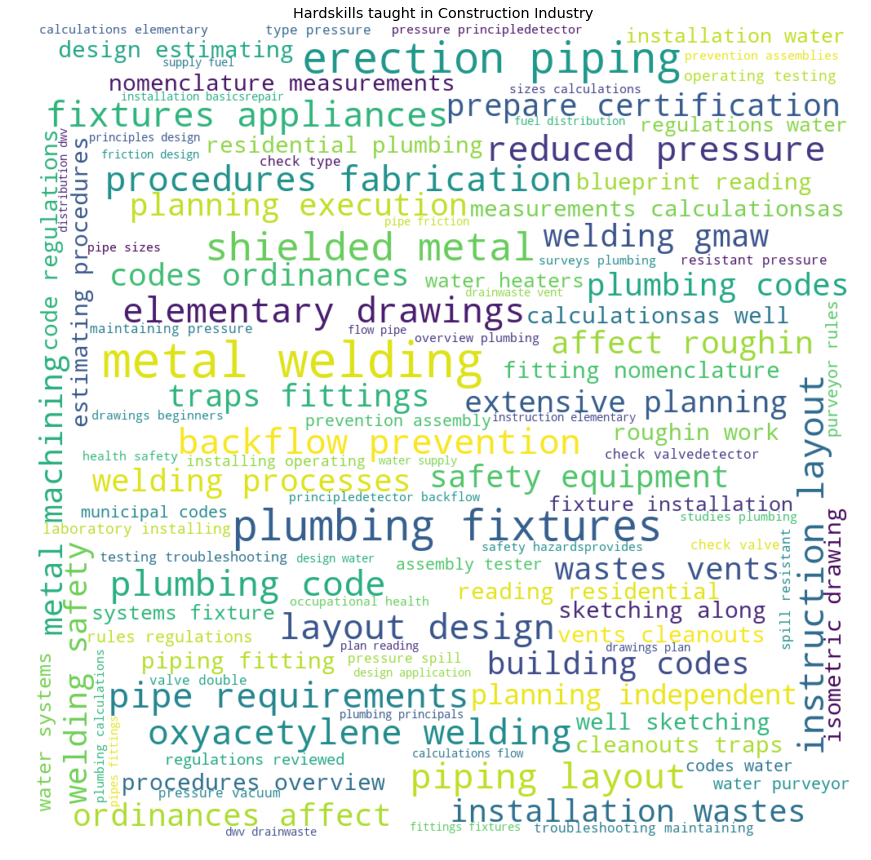

In [35]:

wordCloud = WordCloud(max_font_size=60, 
                      background_color='white',
                      width = 1000,
                      height = 1000)
 
wordCloud.generate_from_frequencies(word_dict)
#plt.imshow(wordCloud, interpolation='bilinear')
#plt.axis("off")
plt.figure( figsize=(30,15) )
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Hardskills taught in Construction Industry')
#plt.figure(figsize=(1000,1000))
#plt.show()
#plt.show()
plt.savefig('Hardskills_frequent_words.png', bbox_inches='tight') 
#wordCloud.to_file("Hardskills_frequent_words.png")
 

In [36]:
word_dict_hs_50=pd.Series(df_hardskills_50.Frequency.values,index=df_hardskills_50.Bigram).to_dict()

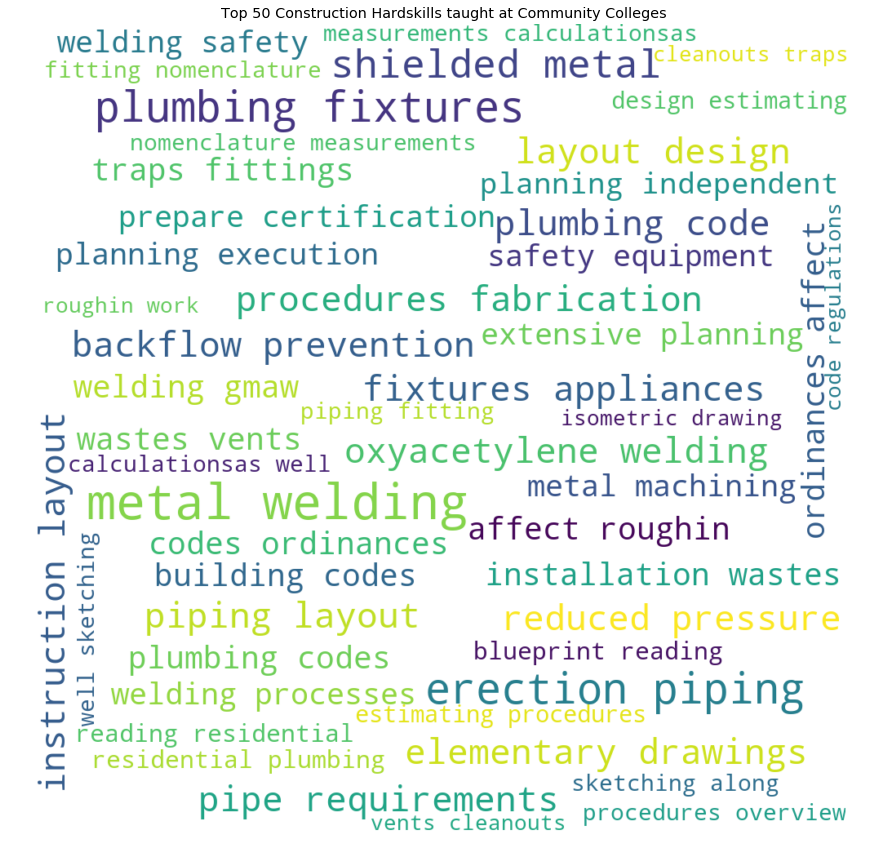

In [37]:
wordCloud_hs_50 = WordCloud(max_font_size=60, 
                      background_color='white',
                      width = 1000,
                      height = 1000)
 
wordCloud_hs_50.generate_from_frequencies(word_dict_hs_50)
#plt.imshow(wordCloud, interpolation='bilinear')
#plt.axis("off")
plt.figure( figsize=(30,15) )
plt.imshow(wordCloud_hs_50, interpolation = 'bilinear')
plt.axis('off')
plt.title('Top 50 Construction Hardskills taught at Community Colleges')
#plt.figure(figsize=(1000,1000))
#plt.show()
#plt.show()
plt.savefig('Hardskills_top_50_supply_side.png', bbox_inches='tight') 
#wordCloud.to_file("Hardskills_frequent_words.png")
 

In [38]:
word_dict_hs_25=pd.Series(df_hardskills_25.Frequency.values,index=df_hardskills_25.Bigram).to_dict()

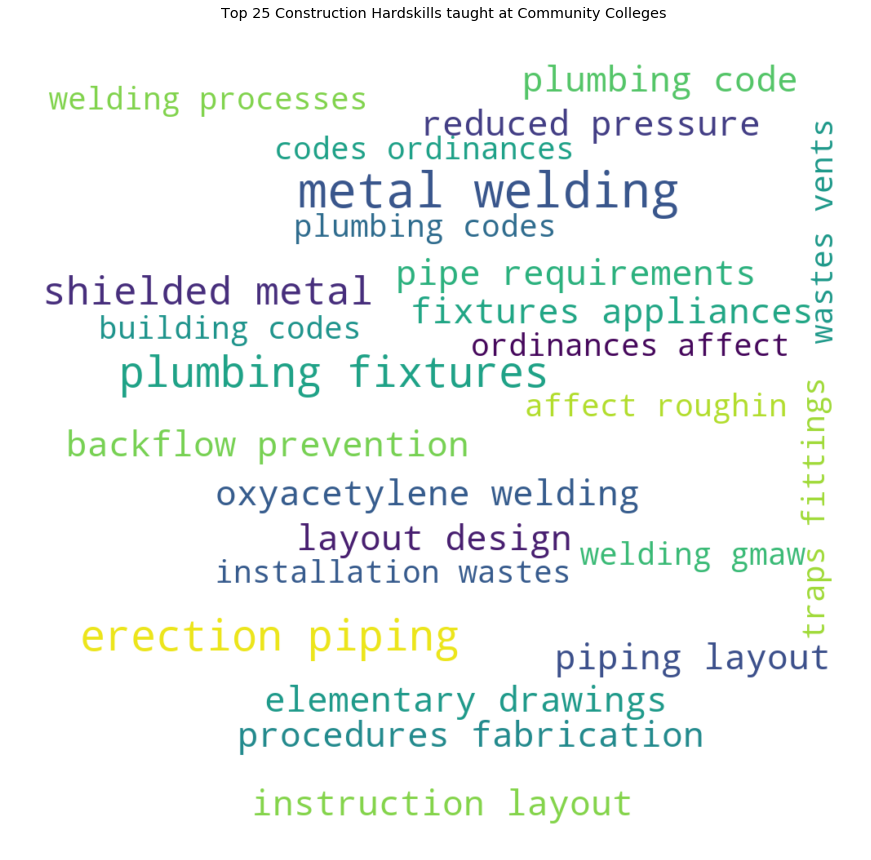

In [39]:
wordCloud_hs_25 = WordCloud(max_font_size=60, 
                      background_color='white',
                      width = 1000,
                      height = 1000)
 
wordCloud_hs_25.generate_from_frequencies(word_dict_hs_25)
#plt.imshow(wordCloud, interpolation='bilinear')
#plt.axis("off")
plt.figure( figsize=(30,15) )
plt.imshow(wordCloud_hs_25, interpolation = 'bilinear')
plt.axis('off')
plt.title('Top 25 Construction Hardskills taught at Community Colleges')
#plt.figure(figsize=(1000,1000))
#plt.show()
#plt.show()
plt.savefig('Hardskills_top_25_supply_side.png', bbox_inches='tight') 
#wordCloud.to_file("Hardskills_frequent_words.png")
 